## 5. Baseline model

As a baseline model, an average of historical data will be computed.

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_pickle('demand_data_for_modelling')

In [4]:
df.head()

,meter_id,date,demand,hours,normalized_demand,demand-24h,normalized_demand-24h
0,1,2005-01-01 00:00:00,3304.0,0.0,0.330996,NaN,NaN
1,1,2005-01-01 01:00:00,3178.0,1.0,0.318373,NaN,NaN
2,1,2005-01-01 02:00:00,2981.0,2.0,0.298638,NaN,NaN
3,1,2005-01-01 03:00:00,2944.0,3.0,0.294931,NaN,NaN
4,1,2005-01-01 04:00:00,2934.0,4.0,0.293929,NaN,NaN


Functions for modelling
--

Split the data into training and test sets:

In [5]:
def train_test_split(df, test_fraction, cols):
    train_fraction = 1-test_fraction
    dates = df.groupby(df.date.dt.date).count().date
    split = (int)(len(dates)*train_fraction)
    split_date = pd.to_datetime(dates.index[split])
    
    X_tr = df[df.date < split_date][cols].values
    y_tr = df[df.date < split_date]['normalized_demand'].values
    
    X_te = df[df.date >= split_date][cols].values
    y_te = df[df.date >= split_date]['normalized_demand'].values
    
    print('Train set')
    print('---------')
    print('Features: {} Target: {}\n'.format(X_tr.shape,y_tr.shape))

    print('Test set')
    print('--------')    
    print('Features: {} Target: {}'.format(X_te.shape,y_te.shape))
    
    return (X_tr,X_te,y_tr,y_te)

Compute the average of training data:

In [6]:
def average_forecast(y):
    return y.mean()

Compute mean absolute error:

In [7]:
def MAE(y,y_pred):    
    return(np.mean(np.abs(y-y_pred)))

Plot the results:

In [8]:
def plot_predictions(X_tr,X_te,y_tr,y_te,y_pred_tr,y_pred_te):
    
    font = {'fontname':'Arial', 'size':'14'}
    font_title = {'fontname':'Arial', 'size':'16'}
    
    plt.figure(figsize=(9,6))
    
    # True values
    plt.plot(X_tr[:,0],y_tr,label='train set',color='black')
    plt.plot(X_te[:,0],y_te,label='test set',color='grey')    
    
    # Predictions
    plt.plot(X_tr[:,0],[y_pred_tr]*X_tr.shape[0],label='predictions train',color='blue')
    plt.plot(X_te[:,0],[y_pred_te]*X_te.shape[0],label='predictions test',color='red')    
    
    plt.xlabel('Date',**font)
    plt.ylabel('Electricity demand',**font)
    
    plt.legend()
    plt.show()

Save the results:

In [9]:
def save_result(meter_id,X_tr,X_te,y_pred_tr,y_pred_te):
    df1 = pd.DataFrame({"meter_id": [meter_id]*X_tr.shape[0], "date": X_tr[:,0], "type": ['training']*X_tr.shape[0], "pred_value": [y_pred_tr]*X_tr.shape[0]})
    df2 = pd.DataFrame({"meter_id": [meter_id]*X_te.shape[0], "date": X_te[:,0], "type": ['test']*X_te.shape[0], "pred_value": [y_pred_te]*X_te.shape[0]})
    result = pd.concat([df1,df2], ignore_index=True)
    return result

Forecasts for the time-series from clusters
--

In [10]:
dtw_clusters = pd.read_pickle('dtw_clusters')
dtw_clusters.sort_values(by='cluster')

,cluster
meter_id_1,
481,1
422,1
52,1
419,1
81,1
86,1
89,1
104,1
113,1


__Cluster 1__

Compute a forecast for one meter from the cluster 1:

In [11]:
meter_481 = df[df['meter_id']==481]

In [12]:
X_tr_481,X_te_481,y_tr_481,y_te_481 = train_test_split(meter_481, 0.2, ['date','normalized_demand'])

Train set
---------
Features: (19008, 2) Target: (19008,)

Test set
--------
Features: (4752, 2) Target: (4752,)


In [13]:
y_pred_te_481 = average_forecast(y_tr_481)

In [14]:
y_pred_tr_481 = average_forecast(y_tr_481)

In [15]:
print('Prediction MAE of baseline model: ', np.round(MAE(y_te_481, y_pred_te_481),2))

Prediction MAE of baseline model:  0.13


Plot the results:

/Users/anastasiagolubkova/anaconda3/envs/exts-ml/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


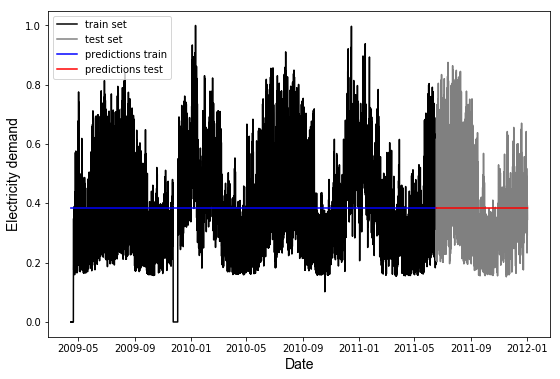

In [16]:
plot_predictions(X_tr_481,X_te_481,y_tr_481,y_te_481,y_pred_tr_481,y_pred_te_481)

Save the results:

In [98]:
pred_481 = save_result(481,X_tr_481,X_te_481,y_pred_tr_481,y_pred_te_481)

In [100]:
pred_481.to_pickle('Baseline_meter481')

__Cluster 2__

In [17]:
meter_10 = df[df['meter_id']==10]

In [18]:
X_tr_10,X_te_10,y_tr_10,y_te_10 = train_test_split(meter_10, 0.2, ['date','normalized_demand'])

Train set
---------
Features: (49056, 2) Target: (49056,)

Test set
--------
Features: (12288, 2) Target: (12288,)


In [19]:
y_pred_te_10 = average_forecast(y_tr_10)

In [20]:
y_pred_tr_10 = average_forecast(y_tr_10)

In [21]:
print('Prediction MAE of baseline model: ', np.round(MAE(y_te_10, y_pred_te_10),2))

Prediction MAE of baseline model:  0.11


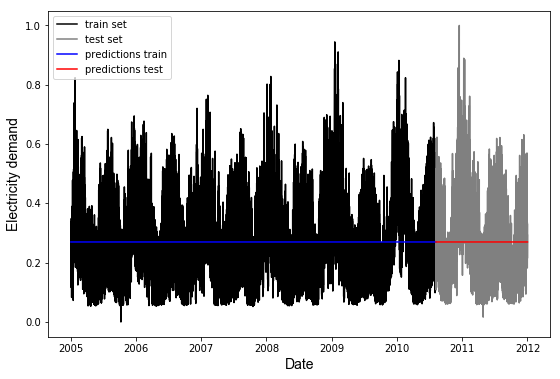

In [22]:
plot_predictions(X_tr_10,X_te_10,y_tr_10,y_te_10,y_pred_tr_10,y_pred_te_10)

In [107]:
pred_10 = save_result(10,X_tr_10,X_te_10,y_pred_tr_10,y_pred_te_10)

In [108]:
pred_10.to_pickle('Baseline_meter10')

__Cluster 3__

In [23]:
meter_453 = df[df['meter_id']==453]

In [24]:
X_tr_453,X_te_453,y_tr_453,y_te_453 = train_test_split(meter_453, 0.2, ['date','normalized_demand'])

Train set
---------
Features: (46176, 2) Target: (46176,)

Test set
--------
Features: (11544, 2) Target: (11544,)


In [25]:
y_pred_te_453 = average_forecast(y_tr_453)

In [26]:
y_pred_tr_453 = average_forecast(y_tr_453)

In [27]:
print('Prediction MAE of baseline model: ', np.round(MAE(y_te_453, y_pred_te_453),2))

Prediction MAE of baseline model:  0.08


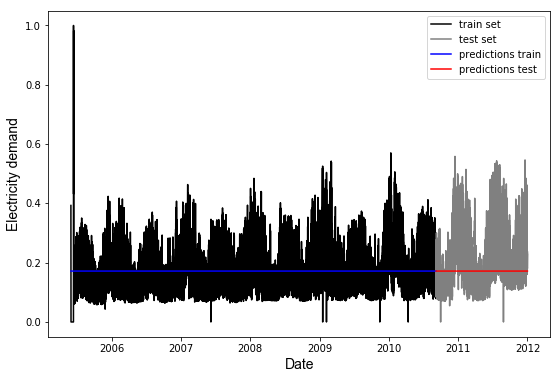

In [28]:
plot_predictions(X_tr_453,X_te_453,y_tr_453,y_te_453,y_pred_tr_453,y_pred_te_453)

In [115]:
pred_453 = save_result(453,X_tr_453,X_te_453,y_pred_tr_453,y_pred_te_453)

In [116]:
pred_453.to_pickle('Baseline_meter453')